In [25]:
from __future__ import print_function
from astropy.coordinates import SkyCoord
import astropy.units as units
from dustmaps.bayestar import BayestarQuery
import matplotlib.colors
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.mlab import griddata
import numpy as np
from scipy.stats import norm
import sfdmap

In [11]:
fullMag =[17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0]
 #periodlist   periodlist   periodlist   periodlist   periodlist   periodlist   periodlist   periodlist   periodlist   periodlist   periodlist   periodlist   periodlist   periodlist   periodlist   periodlist   periodlist   periodlist   periodlist   periodlist 
fullPeriod = [0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0]
 #measuredperiodlist   measuredperiodlist   measuredperiodlist   measuredperiodlist   measuredperiodlist   measuredperiodlist   measuredperiodlist   measuredperiodlist   measuredperiodlist   measuredperiodlist   measuredperiodlist   measuredperiodlist   measuredperiodlist   measuredperiodlist   measuredperiodlist   measuredperiodlist   measuredperiodlist   measuredperiodlist   measuredperiodlist   measuredperiodlist 
fullmeasuredPeriod = [0.005130747212937224, 0.0053095086983166416, 0.0047463803647430879, 0.029924484107504781, 0.03466684576202278, 0.012486424240882116, 0.021317487987540309, 0.057080086443812156, 0.011634326306830025, 0.030378755701987024, 0.81763979677190068, 1.3163144418774848, 1.3165774064691496, 3.6298875034627449, 0.6001478930788452, 11.90369072955637, 17.223399385125262, 10.794150664861379, 27.273488275334149, 13.289354250219015, 0.0035153043163527273, 0.0061768621446556954, 0.0035171124604534282, 0.05782805916221443, 0.028227155053175045, 0.048329217915185782, 0.011009660630298866, 0.014163637538456965, 0.019510935844624176, 0.018554090181351447, 1.1557399325128319, 1.2081432049756435, 2.2056361350240841, 3.8014525361584806, 0.52709440998406254, 11.569635008843587, 16.63447831168536, 33.583194277533856, 18.414730200472359, 119.02807218872384, 0.0043911484911489185, 0.0054555095384242651, 0.0094141243646508575, 0.016237458021530066, 0.034291038993410301, 0.048328780032686217, 0.013276231921294658, 0.018017531665163851, 0.17361913488818057, 0.42802847370737063, 0.73844529311773843, 0.82083689715441532, 2.2290198014063414, 3.7816470880967179, 6.5147247652359699, 13.250814011940772, 20.474461391835703, 22.062903577078828, 30.674743231447579, 13.24255934512137, 0.010876511031536959, 0.0047737211184080332, 0.0035859682443523688, 0.016237828419052976, 0.014133051510808287, 0.048329735983707454, 0.083371920755542867, 0.011608036641405479, 0.077654893176841544, 0.42777668571168603, 0.73845537967019004, 1.2744003588423465, 2.1912957449662041, 3.7901805588453059, 6.4999143535497721, 11.187495111679127, 19.532974443248666, 33.123774547397844, 62.592716990820527, 126.16914012196462, 0.011060693215510547, 0.003342440583333571, 0.0042947349067693884, 0.016415675430643557, 0.028013902510652843, 0.017100025180740223, 0.016302604565583731, 0.02383622306942763, 0.011060661587438417, 0.012890148968055142, 1.1037082963391829, 1.2635138959672458, 0.68011955098717702, 0.65265338859981115, 0.65184409828536127, 24.082865005212877, 59.505652171890944, 67.101346164664818, 26.971023017336869, 40.097063107696016, 0.0038033948411286701, 0.0051795908788525493, 0.0030740227900935848, 0.016238049755427864, 0.028013559397992188, 0.012565393548916105, 0.083369325677878844, 0.012511267488395593, 0.24804293415492881, 0.4278381360671219, 0.78797695090508613, 1.0345200966501142, 2.1964547605488218, 3.7958713363839998, 1.0343066054035828, 11.160203644387114, 19.152964412029334, 35.581834678619252, 27.775485375131883, 93.880149164552762, 0.0031622681911500318, 0.0088513044039453329, 0.0094120051865628426, 0.016237953246903216, 0.017208683084273646, 0.048328072922670239, 0.054533818043735902, 0.017251776477611218, 0.016628860159921297, 0.020340020330177393, 0.73848393548699165, 1.2724850836630548, 2.8702557429741646, 3.7984583678357748, 4.1993083465881673, 14.014444142462754, 13.964074003220555, 31.750868563905904, 51.028367629637714, 79.434297359377155, 0.0031622812990493121, 0.002929039563259293, 0.0094195931998308311, 0.015477106638259075, 0.028013562725200572, 0.040731367513883593, 0.04073117187702642, 0.1438537161287459, 0.010630470400794116, 0.04072581215825239, 0.73840770050311033, 1.2724947671348448, 2.1976683094313083, 3.7916894928503644, 6.5341835338324943, 10.727719909626519, 29.776699745903276, 36.179401228637701, 27.686544438794925, 92.585924075019719, 0.0058260639530033189, 0.00545557042664913, 0.0094120098070228659, 0.020336629517103348, 0.0258974767862057, 0.048327210753362188, 0.013340864173413902, 0.033870878984792359, 0.24820142506564524, 0.014827158028713653, 0.73895173356420041, 1.274564141589168, 2.2023188542800409, 3.7721852748737148, 6.6026042707737167, 11.420037072614637, 19.403910591796578, 32.47692106522365, 58.808304188168869, 94.756973445584308, 0.00468248664471951, 0.0071038993053232028, 0.0094118873155847813, 0.016237665883862575, 0.028014637249806421, 0.048327657627890694, 0.011663356438738868, 0.015660427600053282, 0.2480391498174557, 0.42823498675618976, 0.95783206176809221, 1.2718631322950542, 2.1856000443759789, 3.7808881589446268, 8.5717463149944102, 11.34210908253046, 19.019112765010167, 13.653133521355235, 51.101104843659229, 126.1976405365052, 0.0084380590538935107, 0.0035649765608887834, 0.0052348167183695216, 0.016237525850400898, 0.028014731046497949, 0.048327084824710952, 0.032293067938597105, 0.13892130139822456, 0.24812097745117798, 0.30212795797721392, 0.73806060963767939, 1.2721089441708637, 1.1433188395524319, 3.79222148335006, 6.5669651095478425, 11.24993195629996, 19.442777931063222, 13.276306205850593, 58.583717921840176, 21.575819330397021, 0.0031622780258939711, 0.005177975870100964, 0.0041972051503943921, 0.017669297819353478, 0.028014409880665423, 0.010524651673394034, 0.019511851121050923, 0.010524463779796113, 0.24543192574092521, 0.012131299513307192, 0.73818714574606303, 1.2770387420905949, 2.205533957342618, 3.7932063062962471, 6.3080173391807977, 11.204462270327866, 126.24600577088536, 57.90966282354897, 54.235400501987776, 13.503734101864715, 0.0035798553777784976, 0.0047839738931127664, 0.0094121586554060735, 0.016237468136101663, 0.028025965429474688, 0.036818478524612092, 0.011181818090349968, 0.035542750039505543, 0.042618913393534526, 0.42789225237866813, 0.73831796360910684, 1.2704042428660269, 0.56949740579097419, 3.7935042705732682, 5.3461899251778791, 11.254599960135717, 19.069825866993291, 32.380676787574345, 27.85679278565118, 97.949542673214935, 0.0077749160408413153, 0.0054555720507013681, 0.0073426466983602815, 0.016237172672838199, 0.028014616164148728, 0.04832884869310998, 0.013415123801593687, 0.1469495357710138, 0.24883664612884784, 0.010589550447570388, 0.73913589611099362, 1.2735045379437886, 2.2018969506979245, 3.7880264646313706, 0.50126395295504833, 22.75463391138722, 28.710321613276353, 126.32461525542551, 9.8146977273130922, 101.35538358161138, 0.0043050018353680258, 0.0041623862274925288, 0.009411980780918908, 0.033424313454432225, 0.027419074060002713, 0.018199138672945221, 0.083386114698104433, 0.014134465614283581, 0.024901537359832221, 0.42824152208952232, 0.7375348835964356, 1.2693565336400356, 2.1997035800574873, 0.57914009434077607, 0.57827892341262788, 11.291955052143406, 28.741293381760084, 32.312532093776788, 57.934325494284423, 26.563915034821687, 0.0057380733746219175, 0.0097598124801800013, 0.0065242523739381169, 0.011857221013294212, 0.019860714897843638, 0.02020209847194122, 0.010088625378830316, 0.019861180872081857, 0.014019446198862603, 0.42820308577844551, 0.80929238853106322, 1.2739184883293537, 0.51723070976324881, 3.7659643044005744, 6.4304748170884176, 11.236666526036476, 19.845473457741374, 29.980594108506288, 17.894724444334685, 13.094795630202091, 0.0066185865416291375, 0.0089320574968447877, 0.0039487695233971273, 0.010779197157131749, 0.028087725671316833, 0.011223439962390624, 0.010333967630581023, 0.011538982833817676, 0.014911452976463615, 0.01284001431521517, 0.73863272122491508, 3.6941781957946702, 2.1938350704715672, 3.7457401433672848, 6.3236361242161578, 11.140400922920712, 20.231798676331024, 34.719638762360042, 50.608768842918124, 28.419880320154082, 0.0094789067643771315, 0.0072686297243759416, 0.0054327013539136118, 0.01151542399688525, 0.012701498572122844, 0.048328878181659388, 0.083375948038035427, 0.016777147645397932, 0.10262760702371214, 0.018788690579801228, 1.6304266991534127, 1.2379784583012281, 1.9681395241557078, 0.5083243522136508, 1.2343551325298308, 27.876313882039049, 74.789913588440712, 66.636182249945037, 121.05048757592016, 12.117598470321914, 0.0031621954531121381, 0.0054555010137844317, 0.0093500458560450399, 0.012070214308333729, 0.014257823248307527, 0.01188153293881747, 0.012193975195090025, 0.012440725723937269, 0.014257782396409952, 0.020079507222122914, 0.624219131573863, 1.2730265561238634, 0.81793481604534868, 3.8266873283021203, 6.4781412860409748, 10.7886771925358, 18.620669312379807, 36.197256683076866, 10.420550970075531, 18.458151269432218, 0.0031622779604628419, 0.0054555948928734412, 0.009412048638034038, 0.016237768168884475, 0.028013581965129004, 0.048329271874162409, 0.083378201697167351, 0.14384513831364848, 0.24816328538506532, 0.42813408445193812, 0.7386299732288456, 1.2742914765071474, 2.1984806847914817, 3.7928511706156285, 6.5425131861539603, 11.287348580026386, 19.477703116816485, 33.612335589077674, 57.950255193842573, 99.88088095545163]
 #siglist   siglist   siglist   siglist   siglist   siglist   siglist   siglist   siglist   siglist   siglist   siglist   siglist   siglist   siglist   siglist   siglist   siglist   siglist   siglist 
fullSigLevel = [0.8572, 0.9358, 0.020000000000000018, 0.8935, 0.29190000000000005, 0.9378, 0.474, 0.5761000000000001, 0.7432000000000001, 0.019399999999999973, 0.8952, 0.6774, 0.019100000000000006, 0.269, 0.12260000000000004, 0.9365, 0.03080000000000005, 0.2239, 0.8448, 0.2965, 0.17979999999999996, 0.8501, 0.5403, 0.356, 0.09789999999999999, 0.5700000000000001, 0.279, 0.5661, 0.6996, 0.2509, 0.5174000000000001, 0.37729999999999997, 0.8684000000000001, 0.2772, 0.4889, 0.5016, 0.4093, 0.6477999999999999, 0.35050000000000003, 0.11339999999999995, 0.6579999999999999, 0.6820999999999999, 0.7281, 0.9975, 0.44520000000000004, 0.99, 0.2299, 0.5548, 0.19579999999999997, 0.7331, 1.0, 0.8085, 0.8164, 0.8154, 0.9933, 0.9988, 0.9776, 0.9914, 0.39349999999999996, 0.9797, 0.802, 0.015000000000000013, 0.8704000000000001, 0.977, 0.5405, 0.9065, 0.881, 0.5608, 0.05020000000000002, 0.6799, 0.9901, 0.6517, 0.9191, 0.9949, 0.9633, 0.19999999999999996, 0.08189999999999997, 0.0034999999999999476, 0.5066999999999999, 0.5559000000000001, 0.06720000000000004, 0.5677, 0.12319999999999998, 0.6046, 0.12260000000000004, 0.1048, 0.0686, 0.36319999999999997, 0.8509, 0.024800000000000044, 0.7522, 0.0998, 0.08040000000000003, 0.9666, 0.8115, 0.2672, 0.5262, 0.35629999999999995, 0.3328, 0.7951, 0.1281, 0.5125, 0.1795, 0.9997, 0.6227, 0.02639999999999998, 0.9805, 0.6424000000000001, 0.9991, 0.784, 0.9585, 0.7458, 0.5078, 0.8817, 0.8817, 0.5432, 0.015499999999999958, 0.04359999999999997, 0.18400000000000005, 0.28, 0.7137, 0.8922, 0.9999, 0.9852, 0.4736, 0.5586, 0.08620000000000005, 0.07999999999999996, 0.11170000000000002, 0.3992, 0.6916, 0.9925, 0.17210000000000003, 0.9998, 0.5321, 0.6591, 0.01419999999999999, 0.9994, 0.996, 0.9858, 0.5258, 0.26170000000000004, 0.060799999999999965, 0.036900000000000044, 0.6004, 0.11070000000000002, 0.9956, 1.0, 0.9437, 0.9876, 1.0, 0.7231000000000001, 0.24119999999999997, 1.0, 0.9985, 0.5378000000000001, 0.23750000000000004, 0.24270000000000003, 0.9426, 0.39139999999999997, 0.36719999999999997, 0.9955, 0.9836, 0.0008000000000000229, 0.636, 0.9651, 0.9703, 0.8059000000000001, 0.9946, 0.6779, 0.9803, 0.9997, 0.9972, 0.9994, 0.9979, 0.9982, 0.8664000000000001, 0.6757, 0.48260000000000003, 0.3457, 0.008299999999999974, 0.6152, 0.8821, 0.9992, 0.9882, 1.0, 0.3943, 0.20640000000000003, 0.9429, 0.9976, 0.7706999999999999, 1.0, 0.8872, 0.9934, 0.37529999999999997, 0.999, 0.8906000000000001, 0.18530000000000002, 0.03069999999999995, 0.7658, 0.47540000000000004, 0.8619, 0.9502, 0.7883, 0.9971, 0.9934, 0.04139999999999999, 0.7573, 0.9687, 0.53, 0.7644, 0.9999, 0.9291, 0.9859, 0.8008, 0.8308, 0.7653, 0.8049999999999999, 0.6528, 0.739, 0.3415, 0.8443, 0.1683, 0.24070000000000003, 0.9985, 0.9479, 0.0008000000000000229, 0.999, 0.006199999999999983, 0.5239, 0.9826, 0.9845, 0.21040000000000003, 0.7048, 0.9999, 0.9666, 0.8473999999999999, 0.9809, 0.5801000000000001, 0.4155, 0.01649999999999996, 0.2994, 0.8303, 0.6970000000000001, 0.22360000000000002, 0.4494, 0.6720999999999999, 0.37949999999999995, 0.040200000000000014, 0.8919, 0.9951, 0.754, 0.8586, 1.0, 0.704, 0.9999, 0.8235, 0.9986, 0.06730000000000003, 0.243, 0.9787, 0.8761, 0.4768, 1.0, 0.9999, 1.0, 0.46940000000000004, 0.006399999999999961, 0.8593, 0.4726, 0.9031, 1.0, 1.0, 0.9605, 0.7011000000000001, 0.11870000000000003, 0.7977, 0.7713, 0.7264999999999999, 0.3296, 0.15600000000000003, 0.41369999999999996, 0.35950000000000004, 0.8682, 0.5373, 0.10019999999999996, 0.8518, 0.2993, 0.026499999999999968, 0.3073, 0.25139999999999996, 0.8752, 0.9253, 0.45420000000000005, 0.5434, 0.0837, 0.20479999999999998, 0.6198, 0.6597, 0.028800000000000048, 0.8578, 0.9726, 0.8114, 0.6029, 0.1391, 0.7437, 0.655, 0.006800000000000028, 0.13680000000000003, 0.019499999999999962, 0.5127999999999999, 0.6649, 0.9143, 0.9943, 0.9981, 0.9572, 0.9083, 0.2632, 0.6032, 0.5876, 0.6428, 0.9995, 0.3921, 0.12450000000000006, 0.698, 0.8702, 0.6878, 0.25549999999999995, 0.18330000000000002, 0.41900000000000004, 0.9969, 0.5787, 0.9822, 0.991, 0.7007, 0.5274, 0.48740000000000006, 0.9742, 0.9773, 0.0012999999999999678, 0.6118, 0.9735, 0.28969999999999996, 0.059799999999999964, 0.2834, 0.4929, 1.0, 0.07599999999999996, 0.0021999999999999797, 0.02300000000000002, 0.7473000000000001, 0.8702, 0.13749999999999996, 0.09670000000000001, 0.31220000000000003, 0.27780000000000005, 0.06459999999999999, 0.851, 0.30300000000000005, 0.40469999999999995, 0.30279999999999996, 0.992, 0.6471, 0.42490000000000006, 0.9337, 0.5082, 0.4232, 0.0050000000000000044, 0.843, 0.2197, 0.47540000000000004, 0.9965, 0.5222, 0.9296, 0.9998, 0.8317, 0.1633, 0.34119999999999995, 0.10070000000000001, 0.7175, 0.14900000000000002, 1.0, 0.995, 0.8017, 1.0, 0.8069, 0.22540000000000004, 1.0, 0.6251, 0.15400000000000003, 0.9874, 0.8524, 1.0, 0.8372999999999999, 0.9636, 0.5715, 0.9914, 1.0, 1.0, 1.0]

In [12]:
#fullMag = [17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0]

In [26]:
#fullmaglist  fullmaglist  fullmaglist  fullmaglist  fullmaglist  fullmaglist  fullmaglist  fullmaglist  fullmaglist  fullmaglist  fullmaglist  fullmaglist  fullmaglist  fullmaglist  fullmaglist  fullmaglist  fullmaglist  fullmaglist  fullmaglist  fullmaglist 
fullMag =[17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0]
# periodlist   periodlist   periodlist   periodlist   periodlist   periodlist   periodlist   periodlist   periodlist   periodlist   periodlist   periodlist   periodlist   periodlist   periodlist   periodlist   periodlist   periodlist   periodlist   periodlist 
fullPeriod = [0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0]
# measuredperiodlist   measuredperiodlist   measuredperiodlist   measuredperiodlist   measuredperiodlist   measuredperiodlist   measuredperiodlist   measuredperiodlist   measuredperiodlist   measuredperiodlist   measuredperiodlist   measuredperiodlist   measuredperiodlist   measuredperiodlist   measuredperiodlist   measuredperiodlist   measuredperiodlist   measuredperiodlist   measuredperiodlist   measuredperiodlist 
fullmeasuredPeriod = [0.005130747212937224, 0.0053095086983166416, 0.0047463803647430879, 0.029924484107504781, 0.03466684576202278, 0.012486424240882116, 0.021317487987540309, 0.057080086443812156, 0.011634326306830025, 0.030378755701987024, 0.81763979677190068, 1.3163144418774848, 1.3165774064691496, 3.6298875034627449, 0.6001478930788452, 11.90369072955637, 17.223399385125262, 10.794150664861379, 27.273488275334149, 13.289354250219015, 0.0035153043163527273, 0.0061768621446556954, 0.0035171124604534282, 0.05782805916221443, 0.028227155053175045, 0.048329217915185782, 0.011009660630298866, 0.014163637538456965, 0.019510935844624176, 0.018554090181351447, 1.1557399325128319, 1.2081432049756435, 2.2056361350240841, 3.8014525361584806, 0.52709440998406254, 11.569635008843587, 16.63447831168536, 33.583194277533856, 18.414730200472359, 119.02807218872384, 0.0043911484911489185, 0.0054555095384242651, 0.0094141243646508575, 0.016237458021530066, 0.034291038993410301, 0.048328780032686217, 0.013276231921294658, 0.018017531665163851, 0.17361913488818057, 0.42802847370737063, 0.73844529311773843, 0.82083689715441532, 2.2290198014063414, 3.7816470880967179, 6.5147247652359699, 13.250814011940772, 20.474461391835703, 22.062903577078828, 30.674743231447579, 13.24255934512137, 0.010876511031536959, 0.0047737211184080332, 0.0035859682443523688, 0.016237828419052976, 0.014133051510808287, 0.048329735983707454, 0.083371920755542867, 0.011608036641405479, 0.077654893176841544, 0.42777668571168603, 0.73845537967019004, 1.2744003588423465, 2.1912957449662041, 3.7901805588453059, 6.4999143535497721, 11.187495111679127, 19.532974443248666, 33.123774547397844, 62.592716990820527, 126.16914012196462, 0.011060693215510547, 0.003342440583333571, 0.0042947349067693884, 0.016415675430643557, 0.028013902510652843, 0.017100025180740223, 0.016302604565583731, 0.02383622306942763, 0.011060661587438417, 0.012890148968055142, 1.1037082963391829, 1.2635138959672458, 0.68011955098717702, 0.65265338859981115, 0.65184409828536127, 24.082865005212877, 59.505652171890944, 67.101346164664818, 26.971023017336869, 40.097063107696016, 0.0038033948411286701, 0.0051795908788525493, 0.0030740227900935848, 0.016238049755427864, 0.028013559397992188, 0.012565393548916105, 0.083369325677878844, 0.012511267488395593, 0.24804293415492881, 0.4278381360671219, 0.78797695090508613, 1.0345200966501142, 2.1964547605488218, 3.7958713363839998, 1.0343066054035828, 11.160203644387114, 19.152964412029334, 35.581834678619252, 27.775485375131883, 93.880149164552762, 0.0031622681911500318, 0.0088513044039453329, 0.0094120051865628426, 0.016237953246903216, 0.017208683084273646, 0.048328072922670239, 0.054533818043735902, 0.017251776477611218, 0.016628860159921297, 0.020340020330177393, 0.73848393548699165, 1.2724850836630548, 2.8702557429741646, 3.7984583678357748, 4.1993083465881673, 14.014444142462754, 13.964074003220555, 31.750868563905904, 51.028367629637714, 79.434297359377155, 0.0031622812990493121, 0.002929039563259293, 0.0094195931998308311, 0.015477106638259075, 0.028013562725200572, 0.040731367513883593, 0.04073117187702642, 0.1438537161287459, 0.010630470400794116, 0.04072581215825239, 0.73840770050311033, 1.2724947671348448, 2.1976683094313083, 3.7916894928503644, 6.5341835338324943, 10.727719909626519, 29.776699745903276, 36.179401228637701, 27.686544438794925, 92.585924075019719, 0.0058260639530033189, 0.00545557042664913, 0.0094120098070228659, 0.020336629517103348, 0.0258974767862057, 0.048327210753362188, 0.013340864173413902, 0.033870878984792359, 0.24820142506564524, 0.014827158028713653, 0.73895173356420041, 1.274564141589168, 2.2023188542800409, 3.7721852748737148, 6.6026042707737167, 11.420037072614637, 19.403910591796578, 32.47692106522365, 58.808304188168869, 94.756973445584308, 0.00468248664471951, 0.0071038993053232028, 0.0094118873155847813, 0.016237665883862575, 0.028014637249806421, 0.048327657627890694, 0.011663356438738868, 0.015660427600053282, 0.2480391498174557, 0.42823498675618976, 0.95783206176809221, 1.2718631322950542, 2.1856000443759789, 3.7808881589446268, 8.5717463149944102, 11.34210908253046, 19.019112765010167, 13.653133521355235, 51.101104843659229, 126.1976405365052, 0.0084380590538935107, 0.0035649765608887834, 0.0052348167183695216, 0.016237525850400898, 0.028014731046497949, 0.048327084824710952, 0.032293067938597105, 0.13892130139822456, 0.24812097745117798, 0.30212795797721392, 0.73806060963767939, 1.2721089441708637, 1.1433188395524319, 3.79222148335006, 6.5669651095478425, 11.24993195629996, 19.442777931063222, 13.276306205850593, 58.583717921840176, 21.575819330397021, 0.0031622780258939711, 0.005177975870100964, 0.0041972051503943921, 0.017669297819353478, 0.028014409880665423, 0.010524651673394034, 0.019511851121050923, 0.010524463779796113, 0.24543192574092521, 0.012131299513307192, 0.73818714574606303, 1.2770387420905949, 2.205533957342618, 3.7932063062962471, 6.3080173391807977, 11.204462270327866, 126.24600577088536, 57.90966282354897, 54.235400501987776, 13.503734101864715, 0.0035798553777784976, 0.0047839738931127664, 0.0094121586554060735, 0.016237468136101663, 0.028025965429474688, 0.036818478524612092, 0.011181818090349968, 0.035542750039505543, 0.042618913393534526, 0.42789225237866813, 0.73831796360910684, 1.2704042428660269, 0.56949740579097419, 3.7935042705732682, 5.3461899251778791, 11.254599960135717, 19.069825866993291, 32.380676787574345, 27.85679278565118, 97.949542673214935, 0.0077749160408413153, 0.0054555720507013681, 0.0073426466983602815, 0.016237172672838199, 0.028014616164148728, 0.04832884869310998, 0.013415123801593687, 0.1469495357710138, 0.24883664612884784, 0.010589550447570388, 0.73913589611099362, 1.2735045379437886, 2.2018969506979245, 3.7880264646313706, 0.50126395295504833, 22.75463391138722, 28.710321613276353, 126.32461525542551, 9.8146977273130922, 101.35538358161138, 0.0043050018353680258, 0.0041623862274925288, 0.009411980780918908, 0.033424313454432225, 0.027419074060002713, 0.018199138672945221, 0.083386114698104433, 0.014134465614283581, 0.024901537359832221, 0.42824152208952232, 0.7375348835964356, 1.2693565336400356, 2.1997035800574873, 0.57914009434077607, 0.57827892341262788, 11.291955052143406, 28.741293381760084, 32.312532093776788, 57.934325494284423, 26.563915034821687, 0.0057380733746219175, 0.0097598124801800013, 0.0065242523739381169, 0.011857221013294212, 0.019860714897843638, 0.02020209847194122, 0.010088625378830316, 0.019861180872081857, 0.014019446198862603, 0.42820308577844551, 0.80929238853106322, 1.2739184883293537, 0.51723070976324881, 3.7659643044005744, 6.4304748170884176, 11.236666526036476, 19.845473457741374, 29.980594108506288, 17.894724444334685, 13.094795630202091, 0.0066185865416291375, 0.0089320574968447877, 0.0039487695233971273, 0.010779197157131749, 0.028087725671316833, 0.011223439962390624, 0.010333967630581023, 0.011538982833817676, 0.014911452976463615, 0.01284001431521517, 0.73863272122491508, 3.6941781957946702, 2.1938350704715672, 3.7457401433672848, 6.3236361242161578, 11.140400922920712, 20.231798676331024, 34.719638762360042, 50.608768842918124, 28.419880320154082, 0.0094789067643771315, 0.0072686297243759416, 0.0054327013539136118, 0.01151542399688525, 0.012701498572122844, 0.048328878181659388, 0.083375948038035427, 0.016777147645397932, 0.10262760702371214, 0.018788690579801228, 1.6304266991534127, 1.2379784583012281, 1.9681395241557078, 0.5083243522136508, 1.2343551325298308, 27.876313882039049, 74.789913588440712, 66.636182249945037, 121.05048757592016, 12.117598470321914, 0.0031621954531121381, 0.0054555010137844317, 0.0093500458560450399, 0.012070214308333729, 0.014257823248307527, 0.01188153293881747, 0.012193975195090025, 0.012440725723937269, 0.014257782396409952, 0.020079507222122914, 0.624219131573863, 1.2730265561238634, 0.81793481604534868, 3.8266873283021203, 6.4781412860409748, 10.7886771925358, 18.620669312379807, 36.197256683076866, 10.420550970075531, 18.458151269432218, 0.003162277928790618, 0.0038017881088998028, 0.0054168532857933544, 0.013660648490062042, 0.076889159287247807, 0.10942641067287073, 0.017465216987327697, 0.013771828716472862, 0.013660547067274447, 0.42829597079564719, 0.73827637923616785, 1.269900902916157, 2.1904779028855539, 3.7511988755821553, 6.2867852594775462, 22.459561133116292, 10.333679884837478, 57.637946927154694, 87.396400213310059, 24.40218897795172]
# siglist   siglist   siglist   siglist   siglist   siglist   siglist   siglist   siglist   siglist   siglist   siglist   siglist   siglist   siglist   siglist   siglist   siglist   siglist   siglist 
fullSigLevel = [0.8572, 0.9358, 0.020000000000000018, 0.8935, 0.29190000000000005, 0.9378, 0.474, 0.5761000000000001, 0.7432000000000001, 0.019399999999999973, 0.8952, 0.6774, 0.019100000000000006, 0.269, 0.12260000000000004, 0.9365, 0.03080000000000005, 0.2239, 0.8448, 0.2965, 0.17979999999999996, 0.8501, 0.5403, 0.356, 0.09789999999999999, 0.5700000000000001, 0.279, 0.5661, 0.6996, 0.2509, 0.5174000000000001, 0.37729999999999997, 0.8684000000000001, 0.2772, 0.4889, 0.5016, 0.4093, 0.6477999999999999, 0.35050000000000003, 0.11339999999999995, 0.6579999999999999, 0.6820999999999999, 0.7281, 0.9975, 0.44520000000000004, 0.99, 0.2299, 0.5548, 0.19579999999999997, 0.7331, 1.0, 0.8085, 0.8164, 0.8154, 0.9933, 0.9988, 0.9776, 0.9914, 0.39349999999999996, 0.9797, 0.802, 0.015000000000000013, 0.8704000000000001, 0.977, 0.5405, 0.9065, 0.881, 0.5608, 0.05020000000000002, 0.6799, 0.9901, 0.6517, 0.9191, 0.9949, 0.9633, 0.19999999999999996, 0.08189999999999997, 0.0034999999999999476, 0.5066999999999999, 0.5559000000000001, 0.06720000000000004, 0.5677, 0.12319999999999998, 0.6046, 0.12260000000000004, 0.1048, 0.0686, 0.36319999999999997, 0.8509, 0.024800000000000044, 0.7522, 0.0998, 0.08040000000000003, 0.9666, 0.8115, 0.2672, 0.5262, 0.35629999999999995, 0.3328, 0.7951, 0.1281, 0.5125, 0.1795, 0.9997, 0.6227, 0.02639999999999998, 0.9805, 0.6424000000000001, 0.9991, 0.784, 0.9585, 0.7458, 0.5078, 0.8817, 0.8817, 0.5432, 0.015499999999999958, 0.04359999999999997, 0.18400000000000005, 0.28, 0.7137, 0.8922, 0.9999, 0.9852, 0.4736, 0.5586, 0.08620000000000005, 0.07999999999999996, 0.11170000000000002, 0.3992, 0.6916, 0.9925, 0.17210000000000003, 0.9998, 0.5321, 0.6591, 0.01419999999999999, 0.9994, 0.996, 0.9858, 0.5258, 0.26170000000000004, 0.060799999999999965, 0.036900000000000044, 0.6004, 0.11070000000000002, 0.9956, 1.0, 0.9437, 0.9876, 1.0, 0.7231000000000001, 0.24119999999999997, 1.0, 0.9985, 0.5378000000000001, 0.23750000000000004, 0.24270000000000003, 0.9426, 0.39139999999999997, 0.36719999999999997, 0.9955, 0.9836, 0.0008000000000000229, 0.636, 0.9651, 0.9703, 0.8059000000000001, 0.9946, 0.6779, 0.9803, 0.9997, 0.9972, 0.9994, 0.9979, 0.9982, 0.8664000000000001, 0.6757, 0.48260000000000003, 0.3457, 0.008299999999999974, 0.6152, 0.8821, 0.9992, 0.9882, 1.0, 0.3943, 0.20640000000000003, 0.9429, 0.9976, 0.7706999999999999, 1.0, 0.8872, 0.9934, 0.37529999999999997, 0.999, 0.8906000000000001, 0.18530000000000002, 0.03069999999999995, 0.7658, 0.47540000000000004, 0.8619, 0.9502, 0.7883, 0.9971, 0.9934, 0.04139999999999999, 0.7573, 0.9687, 0.53, 0.7644, 0.9999, 0.9291, 0.9859, 0.8008, 0.8308, 0.7653, 0.8049999999999999, 0.6528, 0.739, 0.3415, 0.8443, 0.1683, 0.24070000000000003, 0.9985, 0.9479, 0.0008000000000000229, 0.999, 0.006199999999999983, 0.5239, 0.9826, 0.9845, 0.21040000000000003, 0.7048, 0.9999, 0.9666, 0.8473999999999999, 0.9809, 0.5801000000000001, 0.4155, 0.01649999999999996, 0.2994, 0.8303, 0.6970000000000001, 0.22360000000000002, 0.4494, 0.6720999999999999, 0.37949999999999995, 0.040200000000000014, 0.8919, 0.9951, 0.754, 0.8586, 1.0, 0.704, 0.9999, 0.8235, 0.9986, 0.06730000000000003, 0.243, 0.9787, 0.8761, 0.4768, 1.0, 0.9999, 1.0, 0.46940000000000004, 0.006399999999999961, 0.8593, 0.4726, 0.9031, 1.0, 1.0, 0.9605, 0.7011000000000001, 0.11870000000000003, 0.7977, 0.7713, 0.7264999999999999, 0.3296, 0.15600000000000003, 0.41369999999999996, 0.35950000000000004, 0.8682, 0.5373, 0.10019999999999996, 0.8518, 0.2993, 0.026499999999999968, 0.3073, 0.25139999999999996, 0.8752, 0.9253, 0.45420000000000005, 0.5434, 0.0837, 0.20479999999999998, 0.6198, 0.6597, 0.028800000000000048, 0.8578, 0.9726, 0.8114, 0.6029, 0.1391, 0.7437, 0.655, 0.006800000000000028, 0.13680000000000003, 0.019499999999999962, 0.5127999999999999, 0.6649, 0.9143, 0.9943, 0.9981, 0.9572, 0.9083, 0.2632, 0.6032, 0.5876, 0.6428, 0.9995, 0.3921, 0.12450000000000006, 0.698, 0.8702, 0.6878, 0.25549999999999995, 0.18330000000000002, 0.41900000000000004, 0.9969, 0.5787, 0.9822, 0.991, 0.7007, 0.5274, 0.48740000000000006, 0.9742, 0.9773, 0.0012999999999999678, 0.6118, 0.9735, 0.28969999999999996, 0.059799999999999964, 0.2834, 0.4929, 1.0, 0.07599999999999996, 0.0021999999999999797, 0.02300000000000002, 0.7473000000000001, 0.8702, 0.13749999999999996, 0.09670000000000001, 0.31220000000000003, 0.27780000000000005, 0.06459999999999999, 0.851, 0.30300000000000005, 0.40469999999999995, 0.30279999999999996, 0.992, 0.6471, 0.42490000000000006, 0.9337, 0.5082, 0.4232, 0.0050000000000000044, 0.843, 0.2197, 0.47540000000000004, 0.9965, 0.5222, 0.9296, 0.9998, 0.8317, 0.1633, 0.34119999999999995, 0.10070000000000001, 0.7175, 0.22150000000000003, 0.4665, 0.9133, 0.7304999999999999, 0.05459999999999998, 0.2278, 0.008299999999999974, 0.5371, 0.118, 0.27680000000000005, 0.9909, 0.48550000000000004, 0.10150000000000003, 0.6901999999999999, 0.9378, 0.6807000000000001, 0.4808, 0.33309999999999995, 0.5316000000000001, 0.5576]


In [27]:
#fullPeriod = [0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0]

In [28]:
#fullmeasuredPeriod = [0.010501209016139872, 0.0054259112052038334, 0.0052090839562447082, 0.014581861674730799, 0.01134247263632321, 0.023149624851904978, 0.02035514151287985, 0.021056334057780752, 0.084153500651593036, 0.32262662319692653, 0.73864154908781376, 0.9570181165759275, 2.1984915174029842, 3.7924523461691479, 6.5463717746382324, 11.286577871404711, 19.47271454769972, 33.537018104826821, 11.701821222039452, 100.18746135772307, 0.0031622775768853058, 0.005455593793565118, 0.0094120472837920226, 0.016237756685502477, 0.028013572267907974, 0.04832927576989101, 0.076944678856943949, 0.014928686886319644, 0.24816607895176845, 0.42812221105959303, 0.73863814308400433, 6.6491213371017723, 2.1985179197492428, 3.792441122660184, 6.5464721018909655, 11.283000376169712, 19.471826892849403, 33.522104098762064, 57.98327832760409, 99.859560922579647, 0.0031622776939378692, 0.0054555943045363538, 0.009412048113335519, 0.016237757302755191, 0.028013594313892953, 0.048329290351329511, 0.083378089113011922, 0.18561943164, 0.24816569448055345, 0.42812449954159798, 0.73862835099802082, 1.274247305097618, 1.8249189780106652, 3.7924972408693205, 6.5452349473192166, 11.285484507192244, 19.480114819940837, 33.565127558436501, 57.933473021898493, 100.09355599056505, 0.0031622776939378692, 0.0054555946064739468, 0.0094120483207214157, 0.016237759977517495, 0.028013579004177482, 0.048329310400821814, 0.083378192186670461, 0.16809122180972624, 0.24816444495733189, 0.42813136513440925, 0.73862068780748003, 1.2742282994835019, 2.1985254633932216, 3.7923064457340017, 6.5443658751585811, 11.285285736457784, 19.473898213399497, 33.568644553648589, 57.928235334952475, 99.960824324096862, 0.0031622777095448784, 0.0054555945832479771, 0.0094120482515927823, 0.016237759566015544, 0.028013579004177482, 0.048329315868868065, 0.083378186761734696, 0.16809126590680862, 0.24816444495733189, 0.42813122209897969, 0.73862026207933451, 1.2742270324627187, 2.1985254633932216, 3.7923176684458419, 6.5443324539151915, 11.285186353716234, 19.473306362562624, 33.566885963918601, 57.925616846612563, 99.960824324096862, 0.0031622777095448784, 0.0054555945600220073, 0.0094120483898500491, 0.016237759566015544, 0.028013580228954102, 0.048329319514232916, 0.083378197611606905, 0.16809131000391411, 0.2481643488406822, 0.42813150816993434, 0.73861983635167983, 1.2742295665068046, 2.1985292352346244, 3.7922952230885842, 6.5443658751585811, 11.285285736457784, 19.473010450634632, 33.562490295614779, 57.933473021898493, 99.953027540858159, 0.003162277701741374, 0.0054555945135700678, 0.0094120483207214157, 0.016237759771766516, 0.028013579616565774, 0.048329315868868065, 0.083378197611606905, 0.16809113361563094, 0.24816425272410694, 0.42813165120555502, 0.73862068780748003, 1.2742295665068046, 2.198521691564761, 3.7922840005095897, 6.5444327186694444, 11.285186353716234, 19.474786057113189, 33.566885963918601, 57.930854060037085, 99.960824324096862, 0.0031622778422044622, 0.0054555946296999166, 0.0094120488046218771, 0.016237760800521459, 0.028013578391789209, 0.048329252075072202, 0.083378170486931691, 0.1438448372205163, 0.24816415660760616, 0.4281340828257294, 0.7386219649948611, 1.2742561745782306, 2.1984990608657782, 3.7925870334584952, 6.54399826025492, 11.287373178452981, 19.474786057113189, 33.575680755626657, 57.922998594985231, 99.92964448707319, 0.003162277834400957, 0.0054555946296999166, 0.0094120489428791611, 0.016237761212023472, 0.028013579616565774, 0.048329252075072202, 0.083378137937344721, 0.14384491795303178, 0.24816415660760616, 0.4281340828257294, 0.7386219649948611, 1.2742612429083036, 2.1985028326165876, 3.7925870334584952, 6.5440316780850019, 11.287770874009492, 19.474786057113189, 33.580959843132611, 57.91252795495997, 99.92964448707319, 0.0031622778422044622, 0.0054555945832479771, 0.0094120490120078049, 0.016237760800521459, 0.028013580228954102, 0.048329255720427435, 0.083378170486931691, 0.1438447887810505, 0.24816425272410694, 0.4281332246036903, 0.73861983635167983, 1.2742625099971214, 2.1985028326165876, 3.7925982578311075, 6.5440985147690922, 11.287273758942495, 19.473306362562624, 33.574801069073779, 57.930854060037085, 99.937437622630824, 0.0031622778265974522, 0.0054555946761518587, 0.0094120490811364487, 0.016237759771766516, 0.028013580228954102, 0.048329253897749745, 0.083378165061998757, 0.14384490180652143, 0.24816420466584724, 0.42813465497566694, 0.73861855917166019, 1.274254907502012, 2.1984613440694609, 3.7925758091523223, 6.5440316780850019, 11.287870302277494, 19.473306362562624, 33.588881587731905, 57.922998594985231, 99.937437622630824, 0.0031622778265974522, 0.0054555945600220073, 0.0094120485972359596, 0.01623775936026458, 0.028013580228954102, 0.048329263011139538, 0.083378165061998757, 0.14384474034161734, 0.24816458913244607, 0.42813465497566694, 0.73862153926524332, 1.2742612429083036, 2.198521691564761, 3.7925309125919959, 6.5438980088124659, 11.287572022728231, 19.472714547699724, 33.566006738148374, 57.93609222056881, 99.92964448707319, 0.0031622778187939469, 0.0054555946993778293, 0.0094120485972359596, 0.016237759977517495, 0.02801358145373083, 0.048329257543105249, 0.083378116237634206, 0.14384490180652143, 0.24816333962035539, 0.42813222334899342, 0.73862281645556915, 1.2742637770884593, 2.1984877456909993, 3.7925758091523223, 6.5438980088124659, 11.286876098413735, 19.474490100213625, 33.587120877068237, 57.93609222056881, 99.921852566840428, 0.0031622778812219897, 0.005455594374214257, 0.0094120484589786859, 0.016237761417774485, 0.02801358145373083, 0.048329261188461307, 0.083378181336799667, 0.14384506327178803, 0.24816415660760616, 0.42813494105120919, 0.73862153926524332, 1.2742612429083036, 2.1984462577132842, 3.7925645849125864, 6.5439648427661394, 11.286577871404711, 19.478042176804507, 33.577440267030575, 57.91252795495997, 99.921852566840428, 0.0031622777953834317, 0.0054555947690557421, 0.009412049150265096, 0.016237761006272462, 0.028013575942236388, 0.048329248429717524, 0.083378246436066783, 0.14384503097870571, 0.24816338767828006, 0.42813365371427969, 0.73861983635167983, 1.2742536404283133, 2.1984839739919559, 3.792508464710445, 6.5437977604415893, 11.288566349202078, 19.477154036183713, 33.586240590956201, 57.904677458851026, 99.937437622630824, 0.0031622778031869369, 0.0054555947458297706, 0.0094120489428791611, 0.016237761829276529, 0.028013582066119237, 0.048329259365783209, 0.083378186761734696, 0.14384490180652143, 0.19871516271292183, 0.42813622839588023, 0.73861855917166019, 1.2742637770884593, 2.1984387146128399, 3.7925421366324237, 6.54399826025492, 11.289262481973006, 19.477450074057938, 33.594164827500961, 57.891598027361752, 99.953027540858159, 0.0031622777953834317, 0.0054555949780894933, 0.0094120492885223887, 0.016237761829276529, 0.028013586352838817, 0.048329259365783209, 0.083378230161240477, 0.14384503097870571, 0.24816415660760616, 0.42813594231861762, 0.73861813344596849, 1.274257441656969, 2.1984387146128399, 3.7924635697445432, 6.5437977604415893, 11.288665791484513, 19.482187904220762, 33.597687910785837, 57.88898285007938, 99.92964448707319, 0.0031622778578114727, 0.0054555947458297706, 0.0094120493576510377, 0.016237761006272462, 0.028013579616565774, 0.048329242961686544, 0.083378203036544071, 0.14384506327178803, 0.24816396437482793, 0.42813794486748452, 0.73861770772076762, 1.2742739139098802, 2.1984802023058538, 3.7925533607392863, 6.5436306866488048, 11.29015763598847, 19.478338241677669, 33.591522999880823, 57.899444977111713, 99.937437622630824, 0.0031622778422044622, 0.0054555951871232584, 0.0094120488737505191, 0.016237761006272462, 0.028013587577616083, 0.048329246607040389, 0.083378186761734696, 0.14384493409954577, 0.24816415660760616, 0.42813508408912365, 0.73861855917166019, 1.274289119444411, 2.1984651156908575, 3.7925758091523223, 6.5434636213871338, 11.288864681305467, 19.483668948872356, 33.604736294654884, 57.909910886414245, 99.960824324096862, 0.0031622779046325059, 0.0054555947458297706, 0.0094120483207214157, 0.016237766150049255, 0.028013589414782183, 0.048329304932776818, 0.083378257285954521, 0.14384507941833463, 0.24816261875371898, 0.42813808790740615, 0.73862153926524332, 1.2742764481404354, 2.1983632864552307, 3.7925309125919959, 6.5430961078377559, 11.287770874009492, 19.482187904220762, 33.600330708220127, 57.870683222695448, 99.859560922579647]

In [29]:
#fullSigLevel = [0.5, 0.41800000000000004, 0.21799999999999997, 0.236, 0.62, 0.806, 0.02400000000000002, 0.8200000000000001, 0.482, 0.15000000000000002, 0.632, 0.062000000000000055, 0.796, 0.244, 1.0, 0.772, 0.98, 0.18799999999999994, 0.5640000000000001, 0.6579999999999999, 0.5900000000000001, 0.996, 0.846, 0.47, 0.974, 0.922, 0.748, 0.872, 0.40800000000000003, 0.62, 0.996, 0.986, 1.0, 0.906, 1.0, 1.0, 1.0, 0.984, 0.994, 1.0, 0.69, 1.0, 0.994, 0.998, 1.0, 1.0, 0.868, 0.6819999999999999, 0.986, 0.988, 1.0, 1.0, 1.0, 0.968, 1.0, 0.996, 1.0, 0.998, 1.0, 1.0, 0.508, 1.0, 1.0, 1.0, 1.0, 1.0, 0.978, 1.0, 0.998, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.46199999999999997, 1.0, 1.0, 1.0, 1.0, 1.0, 0.998, 1.0, 0.998, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.398, 1.0, 1.0, 1.0, 1.0, 1.0, 0.996, 0.998, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.998, 1.0, 1.0, 0.406, 1.0, 1.0, 1.0, 1.0, 1.0, 0.988, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.608, 1.0, 1.0, 1.0, 1.0, 1.0, 0.982, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.35, 1.0, 1.0, 1.0, 1.0, 1.0, 0.974, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.29400000000000004, 1.0, 1.0, 1.0, 1.0, 1.0, 0.99, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6, 1.0, 1.0, 1.0, 1.0, 1.0, 0.988, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.502, 1.0, 1.0, 1.0, 1.0, 1.0, 0.998, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.16200000000000003, 1.0, 1.0, 1.0, 1.0, 1.0, 0.968, 1.0, 0.996, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.05400000000000005, 1.0, 1.0, 1.0, 1.0, 1.0, 0.938, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.78, 1.0, 1.0, 0.85, 1.0, 0.28200000000000003, 0.894, 0.998, 0.9359999999999999, 1.0, 1.0, 1.0, 0.996, 0.998, 1.0, 0.992, 1.0, 0.998, 1.0, 1.0, 0.08399999999999996, 1.0, 1.0, 1.0, 1.0, 1.0, 0.97, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.23199999999999998, 1.0, 1.0, 1.0, 1.0, 1.0, 0.992, 1.0, 0.996, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.23199999999999998, 1.0, 1.0, 1.0, 1.0, 0.996, 0.958, 1.0, 0.996, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.040000000000000036, 1.0, 1.0, 1.0, 1.0, 0.996, 0.968, 1.0, 0.98, 1.0, 1.0, 1.0, 0.996, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.516, 1.0, 1.0, 1.0, 1.0, 1.0, 0.986, 1.0, 0.96, 0.996, 1.0, 1.0, 1.0, 1.0, 1.0, 0.998, 0.998, 1.0, 1.0, 1.0]

In [30]:
fullPeriod = [x*2 for x in fullPeriod]
fullmeasuredPeriod = [x*2 for x in fullmeasuredPeriod]

In [31]:
reshapelen = (len(fullMag))**0.5
reshapelen = int(reshapelen)
fullMagArray = np.asarray(fullMag)
fullMag = fullMagArray.reshape(-1,reshapelen)
fullMag = fullMag.tolist()
fullPeriodArray = np.asarray(fullPeriod)
fullPeriod = fullPeriodArray.reshape(-1,reshapelen)
fullPeriod = fullPeriod.tolist()
fullmeasuredPeriodArray = np.asarray(fullmeasuredPeriod)
fullmeasuredPeriod = fullmeasuredPeriodArray.reshape(-1,reshapelen)
fullmeasuredPeriod = fullmeasuredPeriod.tolist()
fullSigLevelArray = np.asarray(fullSigLevel)
fullSigLevel = fullSigLevelArray.reshape(-1,reshapelen)
fullSigLevel = fullSigLevel.tolist()

In [32]:
for x in range(len(fullPeriod)):
    fullPeriod[x], fullSigLevel[x], fullmeasuredPeriod[x] = (list(t) for t in zip(*sorted(zip(fullPeriod[x],fullSigLevel[x],fullmeasuredPeriod[x]))))

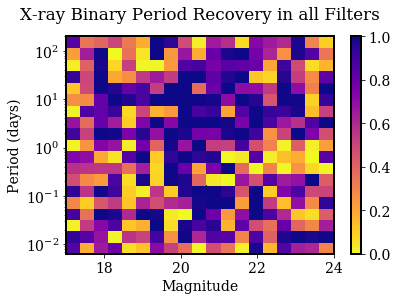

In [33]:
FilterLabel = ['u','g','r','i','z','y']


im = plt.pcolor(fullMag,fullPeriod,fullSigLevel,cmap='plasma_r',vmin=0,vmax=1)
plt.yscale('log')
plt.colorbar(im)
font = {'family' : 'serif',
        'weight' : 'normal',
    'size'   : 14}
plt.rc('font', **font)
plt.rc('axes',linewidth=2)
plt.xlabel('Magnitude')#,fontweight='semibold')
plt.ylabel('Period (days)')#,fontweight='semibold')
plt.title('X-ray Binary Period Recovery in all Filters',y=1.05)#,fontweight='semibold')
plt.show()

In [34]:
count = 0
othercount = 0
seventeenth = 0
twentyfour = 0
lowPeriod = 0
highPeriod = 0
bigSig = 0
for y in range(0,len(fullPeriod)):
    for z in range(0, len(fullPeriod[0])):
        if fullmeasuredPeriod[y][z] < (fullPeriod[y][z]+(fullPeriod[y][z]*0.05)) and fullmeasuredPeriod[y][z] > (fullPeriod[y][z]-(fullPeriod[y][z]*0.05)):
            donothing = 0
            othercount += 1
            if y == 0:
                seventeenth += 1
            if y == (len(fullPeriod)-1):
                twentyfour += 1
            if z == 0:
                lowPeriod += 1
            if z == len(fullPeriod[0]) - 1:
                highPeriod += 1
            if fullSigLevel[y][z] == 1.0:
                bigSig += 1
        else: 
            fullSigLevel[y][z] = 0
            count += 1

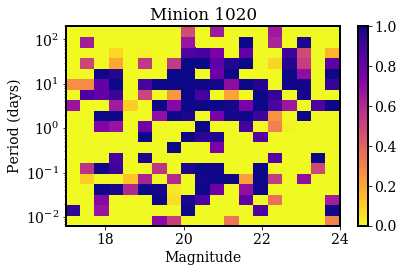

In [35]:
FilterLabel = ['u','g','r','i','z','y']


im = plt.pcolor(fullMag,fullPeriod,fullSigLevel,cmap='plasma_r',vmin=0,vmax=1)
plt.yscale('log')
plt.colorbar(im)
font = {'family' : 'serif',
        'weight' : 'normal',
    'size'   : 14}
plt.rc('font', **font)
plt.rc('axes',linewidth=2)
plt.title('Minion 1020')
plt.xlabel('Magnitude')#,fontweight='semibold')
plt.ylabel('Period (days)')#,fontweight='semibold')
#plt.title('X-ray Binary Period Recovery using the Minion_1020 Observing Strategy',y=1.05)#,fontweight='semibold')
plt.tight_layout()
plt.savefig('panstars500sig.png',dpi = 500,bbox_inches='tight')
#plt.tight_layout()
plt.show()

In [36]:
print('lowPeriod',lowPeriod/20.)
print('highPeriod',highPeriod/20.)
print('seventeenth',seventeenth/20.)
print('twentyfour',twentyfour/20.)
print('bigSig',bigSig/400.)
print('tot',othercount/400.)

lowPeriod 0.25
highPeriod 0.1
seventeenth 0.15
twentyfour 0.35
bigSig 0.03
tot 0.4225


In [37]:
print(fullSigLevel)

[[0, 0.9358, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.6774, 0, 0.269, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0.09789999999999999, 0.5700000000000001, 0, 0, 0, 0, 0, 0, 0.8684000000000001, 0.2772, 0, 0.5016, 0, 0.6477999999999999, 0, 0], [0, 0.6820999999999999, 0.7281, 0.9975, 0, 0.99, 0, 0, 0, 0.7331, 1.0, 0, 0.8164, 0.8154, 0.9933, 0, 0, 0, 0, 0], [0, 0, 0, 0.977, 0, 0.9065, 0.881, 0, 0, 0.6799, 0.9901, 0.6517, 0.9191, 0.9949, 0.9633, 0.19999999999999996, 0.08189999999999997, 0.0034999999999999476, 0, 0], [0, 0, 0, 0.6046, 0.12260000000000004, 0, 0, 0, 0, 0, 0, 0.0998, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0.9997, 0.6227, 0, 0.9805, 0, 0.9991, 0.784, 0, 0, 0.5078, 0.8817, 0, 0.5432, 0.015499999999999958, 0, 0, 0], [0.7137, 0, 0.9999, 0.9852, 0, 0.5586, 0, 0, 0, 0, 0.6916, 0.9925, 0, 0.9998, 0, 0, 0, 0, 0, 0], [0.5258, 0, 0.060799999999999965, 0.036900000000000044, 0.6004, 0, 0, 1.0, 0, 0, 1.0, 0.7231000000000001, 0.24119999999999997, 1.0, 0.9985, 0.5378000000000001, 0, 0, 0, 0], [0, 0.9955, 0.9836, 0, 0, 0

In [38]:
def rfromRV(R,V):
    r = (0.34)*(V-R)+0.015 + R
    return r
#rM = rfromRV(4.04,4.680)
rM = rfromRV(2.67,3.59)
print(rfromRV(5.27,5.9))

5.4992


In [39]:
def gaussian(average,std,xvalue):
    y = np.exp(-(((xvalue-average)/std)**2))
    return y

In [40]:
def rfromRV(R,V):
    r = (0.34)*(V-R)+0.015 + R
    return r
rM = rfromRV(4.04,4.680)
#rM = rfromRV(2.67,3.59)
print(rM)

def gaussian(average,std,xvalue):
    y = np.exp(-(((xvalue-average)/std)**2))
    return y

def newWeight(noSteps,fullPeriod,rM):
    bayestar = BayestarQuery(max_samples=2)
    ebv=[]
    ebv1d = []
    m = sfdmap.SFDMap('/home/mj1e16/DUST_DIR/sfddata-master/sfd')
    rogrim = 1
    rtgrim = 1.9
    rdgrim = 3.5
    rzgrim = 0.41
    rmgrim = 6.5
    gamma = 1.8
    bulge = 0.66
    disc = 0.33
    distance = np.linspace(0.1,30.1,noSteps)
    magrange = np.linspace(17,24,len(fullPeriod))
    number = 0
    l = np.linspace(0., 360., 61)
    R = 2.273
    for i,x in enumerate(l):
        ebvPerD = []
        for d,dis in enumerate(distance):
            coords = SkyCoord(x*units.deg, 0.*units.deg,distance=(dis*1000)*units.pc, frame='galactic')
            ebvPerD.append(bayestar(coords, mode='median'))
        string = str(ebvPerD)
        if 'nan' in string:
            if number == 0:
                startNan = i
            ebvPerD = []
            number += 1
            for d,dis in enumerate(distance):
                angle = startNan-(x-startNan)
                coords = SkyCoord(angle*units.deg, 0.*units.deg,distance=(dis*1000)*units.pc, frame='galactic')
                ebvPerD.append(bayestar(coords, mode='median'))
        ebv.append(ebvPerD)

    mag = []
    #test = {}
    for y in range(len(l)):
        magperanlge = []
        for x,item in enumerate(distance): 
            magperanlge.append((5*np.log10((item*(1000/10)))+rM)+((ebv[y][x])*R))
            #test[d] = (5*np.log10((item*(1000/10)))+rM)+((ebv[y]+(item*0.53))*R)
        mag.append(magperanlge)
        
    totmag, totmaglist, brightProfile, brightProfilelist = [],[],[],[]
    xtotal, xlist, ytotal, ylist = [],[],[],[]
    Rd = 3 #kpc
    counter = 0
    othercounter = 0
    for x,angle in enumerate(l):
        for y,item in enumerate(distance):
            xlen = (((item*np.cos(np.deg2rad(l[x])))-8))
            ylen = ((item*np.sin(np.deg2rad(l[x]))))

            if xlen**2+ylen**2 < 15**2:
                xtotal.append(xlen)
                ytotal.append(ylen)
                totmaglist.append(mag[x][y])
                dist = ((xlen**2)+(ylen**2))**0.5
                #brightProfilelist.append(np.exp(-(dist/Rd)))
                brightProfilelist.append((bulge*((dist/rogrim)**gamma)*np.exp(-(dist**2/rtgrim**2)))+(disc*(np.exp((-rmgrim/dist)-(dist/rdgrim)))))
                othercounter += 1
                if mag[x][y] > 24 or mag[x][y] < 17:
                    counter += 1
        xlist.append(xtotal)
        ylist.append(ytotal)
        totmag.append(totmaglist)
        brightProfile.append(brightProfilelist)
    
    ### Cuurently using a uniform distribution of LMXBs, to change to sersic profile, multiple each positions magnitude
    ### by the likelyhood of a lmxb being there. Then normalise by dividing by the total number of positions multiplied by 
    ### their respective proportions. 

    magrange = np.linspace(17,24,len(fullPeriod))
    magbin = [[]]*20
    magrep = []
    magbinNo = [[]]*20
    for x,item in enumerate(magrange):
        magBinTemp = []
        magNoTemp = []
        for z in range(len(l)):
            if x < 19:
                magBinTemp.extend([a for a in totmag[z] if a >= magrange[x] and a < magrange[x+1]])
                magNoTemp.extend([i for i,a in enumerate(totmag[z]) if a >= magrange[x] and a<magrange[x+1]])
                #plt.plot()
            else:
                magBinTemp.extend([a for a in totmag[z] if a >= magrange[x] and a<magrange[19]])
                magNoTemp.extend([i for i,a in enumerate(totmag[z]) if a >= magrange[x] and a<magrange[19]])
        magbin[x] = magBinTemp
        magbinNo[x] = magNoTemp

    length = 0
    value = 0
    for x in range(len(brightProfile)):
        length += len(brightProfile[x])
        value += sum (brightProfile[x])
    magrepstep = []
    for x in range(len(magbin)):
        for y in range(len(magbin[x])):
            magrepstep.append((brightProfile[x][magbinNo[x][y]]*(1/value)))
            #print(len(magrepstep))
        magrep.append(sum(magrepstep))
        #print(magrep[x])

    magProp = [float(a)/len(magrep) for a in magrep]    

    
    def gaussian(average,std,xvalue):
        y = np.exp(-(((xvalue-average)/std)**2))
        return y

    mean = 2.3774375000000001
    std = 5.8535886356015618
    gauss = []
    
    for T in range(len(fullPeriod[0])):    
        gauss.append(gaussian(mean,std,fullPeriod[0][T]))

    normalised = [x/sum(gauss) for x in gauss]
    weight = []
    for x in range(len(fullPeriod)):
        for y in range(len(fullPeriod[x])):
            weight.append(fullSigLevel[x][y]*normalised[y]*magProp[x])#*brightProfile[x][y])
            #print(fullSigLevel[x][y],normalised[y],magProp[x],brightProfile[x][y])
    return sum(weight)

4.2726


In [43]:
newWeight(61,fullPeriod,rM)

0.11005037418809656

In [19]:
# plt.plot(xlist,ylist,'o',c=totmag)
# plt.show()

def grid(x, y, z, resX=100, resY=100):
    "Convert 3 column data to matplotlib grid"
    xi = np.linspace(min(x), max(x), resX)
    yi = np.linspace(min(y), max(y), resY)
    Z = griddata(x, y, z, xi, yi,interp='linear')
    X, Y = np.meshgrid(xi, yi)
    return X, Y, Z

fig, ax = plt.subplots()
X, Y, Z = grid(xlist[0], ylist[0], totmag[0])
cs = plt.contourf(X, Y, Z)
norm= matplotlib.colors.Normalize(vmin=cs.vmin, vmax=cs.vmax)
sm = plt.cm.ScalarMappable(norm=norm, cmap = cs.cmap)
sm.set_array([])
fig.colorbar(sm, ticks=cs.levels)
#plt.colorbar(label='Magnitude')
plt.xlabel('Distance (kpc)')
plt.ylabel('Distance (kpc)')
plt.show()


NameError: name 'xlist' is not defined

In [20]:
plt.pcolor(X,Y,Z,cmap='inferno_r')#cmap='plasma_r')
plt.colorbar()
#plt.title('K type star Visibility Throughout the Milky Way')
plt.xlabel('Distance (kpc)')
plt.ylabel('Distance (kpc)')
plt.show()
# plt.pcolor(X,Y,Z,cmap='plasma_r')
# plt.colorbar()
# plt.show()

NameError: name 'X' is not defined

In [ ]:
plt.plot(magrange[0:19],magProp[0:19])
plt.ylabel('Fractional Proportion')
plt.xlabel('magnitude')
plt.show()

In [ ]:
print(mean,std)

In [ ]:
sum(weight)*1300

In [ ]:
print(rM)

In [ ]:
rM = rfromRV(2.67,3.59)

In [ ]:
rM = rfromRV(4.04,4.680)

In [42]:
print(fullSigLevel)

[[0, 0.9358, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.6774, 0, 0.269, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0.09789999999999999, 0.5700000000000001, 0, 0, 0, 0, 0, 0, 0.8684000000000001, 0.2772, 0, 0.5016, 0, 0.6477999999999999, 0, 0], [0, 0.6820999999999999, 0.7281, 0.9975, 0, 0.99, 0, 0, 0, 0.7331, 1.0, 0, 0.8164, 0.8154, 0.9933, 0, 0, 0, 0, 0], [0, 0, 0, 0.977, 0, 0.9065, 0.881, 0, 0, 0.6799, 0.9901, 0.6517, 0.9191, 0.9949, 0.9633, 0.19999999999999996, 0.08189999999999997, 0.0034999999999999476, 0, 0], [0, 0, 0, 0.6046, 0.12260000000000004, 0, 0, 0, 0, 0, 0, 0.0998, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0.9997, 0.6227, 0, 0.9805, 0, 0.9991, 0.784, 0, 0, 0.5078, 0.8817, 0, 0.5432, 0.015499999999999958, 0, 0, 0], [0.7137, 0, 0.9999, 0.9852, 0, 0.5586, 0, 0, 0, 0, 0.6916, 0.9925, 0, 0.9998, 0, 0, 0, 0, 0, 0], [0.5258, 0, 0.060799999999999965, 0.036900000000000044, 0.6004, 0, 0, 1.0, 0, 0, 1.0, 0.7231000000000001, 0.24119999999999997, 1.0, 0.9985, 0.5378000000000001, 0, 0, 0, 0], [0, 0.9955, 0.9836, 0, 0, 0